<h1><center>Mineração Estatística de Dados</center></h1>

<h2><center>Projeto 4: Clustering</center></h2>
<br>
<br>
<br>


<h2><center>Bruno Gomes Coelho - 9791160</center></h2>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Imports e ler os dados

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.datasets import make_moons, load_iris
from sklearn.decomposition import PCA

# import hierarchical clustering libraries
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage

N_SAMPLES = 1000
SIZE = (8, 6) # size of the plots

TESTING = False
if TESTING:
    N_SAMPLES = 100



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q1

**Consider os dados gerados pelo código `create_data`. Usando o método k-means, determine o número ideal de sementes (Elbow Method) para noise=0.1, 0.2 e 0.5.**

In [2]:
def create_data(noise, return_single_df=False):
    X, y = make_moons(n_samples=N_SAMPLES, noise=noise)
    d = np.column_stack((X,np.transpose(y)))
    data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y']) 

    if return_single_df:
        return data
    else:
        return X, y

def plot_elbow(k_options, distortions, noise):
    # Plot the elbow
    plt.figure(figsize=SIZE)
    sns.lineplot(k_options, distortions)
    sns.scatterplot(k_options, distortions)
    plt.xticks(k_options)
    plt.xlabel('k')
    plt.ylabel('Distorção')
    plt.title(f"Gráfico do método de Elbow noise={noise}")
    plt.show()

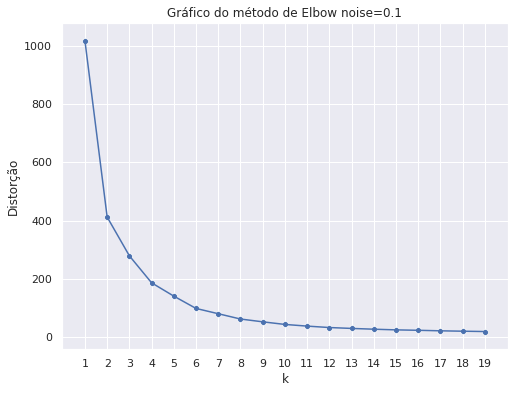

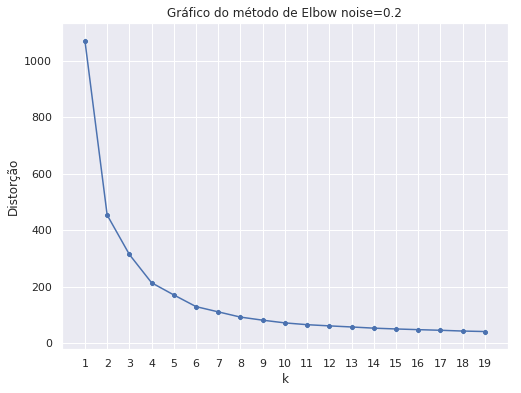

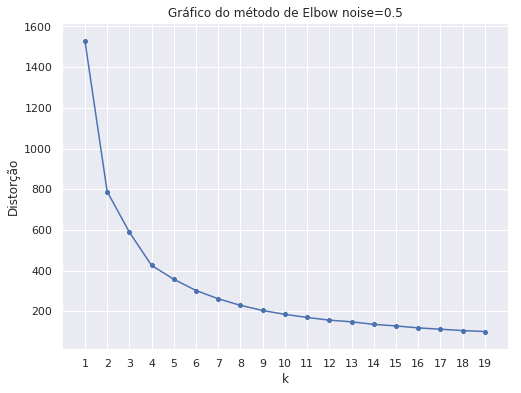

In [3]:
k_options = [x for x in range(1,20)]

for noise in [0.1, 0.2, 0.5]:
    X, y = create_data(noise=noise)
    distortions = []
    
    for k in k_options:
        kmean_model = KMeans(n_clusters=k).fit(X)
        distortions.append(kmean_model.inertia_)
    plot_elbow(k_options, distortions, noise)

Conforme pode ser observado pelos dados acima, o comportamento do KMeans para os 3 valores de ruído testados (0.1, 0.2 e 0.5)  são muito parecidos, embora conforme aumentamos o ruído maior a distorção, conforme esperado;

Nos 3 casos somos levados e escolher um K ideal entre 4 e 6 dependendo da interpretação do leitor, como por exemplo K=5 na minha opinião.



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q2

**Construa um gráfico da medida silhouette_score em função do nível de ruído noise. Considere os métodos k-means e spectral clustering.**

In [4]:
scores = pd.DataFrame(columns=["Noise", "Silhouette Score", "Model"])
noises = [x*10 for x in range(0, 10)]
models = [KMeans, SpectralClustering]
model_names = ["Kmeans", "Spectral Clustering"]

for model, model_name in zip(models, model_names):
    for noise in noises:
        X, y = create_data(noise=noise/100)
        kmeans_model = KMeans().fit(X)
        labels = kmeans_model.labels_
        score = silhouette_score(X, labels, metric='euclidean')
        scores.loc[len(scores)] = [noise, score, model_name]

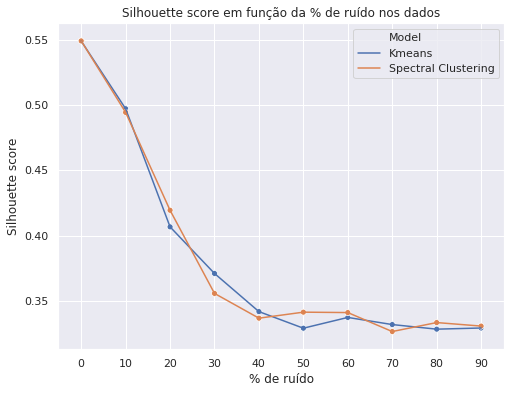

In [5]:
plt.figure(figsize=SIZE)
sns.lineplot(data=scores, x="Noise", y="Silhouette Score", hue="Model")
sns.scatterplot(data=scores, x="Noise", y="Silhouette Score", hue="Model", legend=False)
plt.xticks(noises)
plt.xlabel("% de ruído")
plt.ylabel("Silhouette score")
plt.title("Silhouette score em função da % de ruído nos dados");

Conforme podemos observar no gráfico acima, tanto o KMeans como o Spectral Clustering são fortmente influenciados pela quantidade de ruído, quando comparados aos resultados com 0% de ruído;

Em ambos os casos, o maior efeito do ruído para se limitar a 0-30%, onde a partir de 30% há uma estagnação no efeito do ruído sobre o clustering.

EM geral os dois modelos apresentaram um resultado extramamente similar, sem um deles se mostrando superior na maioria dos casos.



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q3

**Para o método DBSCAN, varie os valores eps e min_samples para obter o máximo da medida silhouette_score. Grafique os resultados para os melhores valores encontrados**

In [6]:
scores = pd.DataFrame(columns=["Eps", "Min Samples", "Silhouette Score"])
all_eps = [x/10 for x in range(3, 9)]
all_min_samples = [x for x in range(1, 10)]

for eps in all_eps:
    for min_samples in all_min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = dbscan.labels_
        score = silhouette_score(X, labels, metric='euclidean')
        scores.loc[len(scores)] = [eps, min_samples, score]

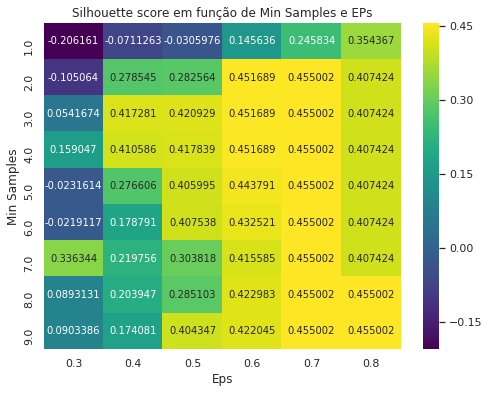

In [7]:
plt.figure(figsize=SIZE)
result = scores.pivot(index="Min Samples", columns="Eps", values="Silhouette Score")
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.ylabel("Min Samples")
plt.xlabel("Eps")
plt.title("Silhouette score em função de Min Samples e EPs");

In [8]:
print("Melhor valor encontrado:\n", 
      scores.loc[scores["Silhouette Score"].idxmax(axis=1)])

Melhor valor encontrado:
 Eps                 0.700000
Min Samples         2.000000
Silhouette Score    0.455002
Name: 37, dtype: float64


Conforme pode ser observado no heatmap acima, os valores mais altos para o Silhouette Score foram obtidos quando:

- O paramêtro *EPS*, isto é, a distância máxima entre duas amostras para uma ser considerada na vizinhança da outra, assumia valores maiores ou iguais a 0.6;


- O paramêtro *Min Samples*, isto é, o número de amostras em uma vizinhança para que um ponto seja considerado como um ponto central, assumia valores maiores que 5;

**O melhor valor encontrado em si foi Eps = 0.6 e Min Samples = 6, obtendo um Silhouette Score de 0.545565.**

É interessante ressaltar que nem sempre conseguimos incluir todos os valores possíveis para Eps e Min Samples, uma vez que dependendo da configuração terminamos com 1 cluster só, dando erro na nossa métrica de silhouette.



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q4

**Considere os dados da Iris. Construa os dendrogramas usando Agglomerative Hierarchical Clustering com os métodos average linkage, Ward e Complete Linkage. Encontre o melhor valor de k e mostre os dados projetados usando PCA e os clusters obtidos.**

In [9]:
# Carregando Iris
X, y = load_iris(return_X_y=True)

In [10]:
scores = pd.DataFrame(columns=["K", "Método", "Silhouette Score"])
k_options = range(2,20)
methods = ["average", "ward", "complete"]

for method in methods:
    for k in k_options:
        hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', 
                                     linkage=method).fit(X)
        labels = hc.labels_
        score = silhouette_score(X, labels, metric='euclidean')
        scores.loc[len(scores)] = [k, method, score]

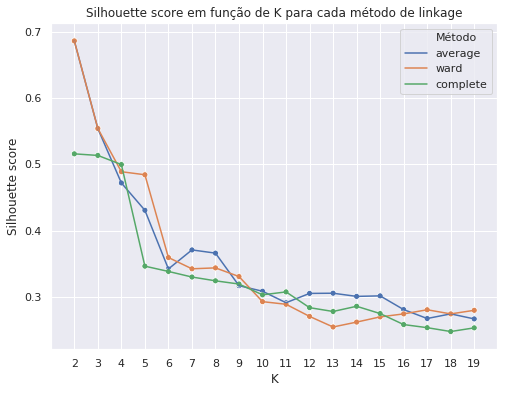

In [11]:
plt.figure(figsize=SIZE)
sns.lineplot(data=scores, x="K", y="Silhouette Score", hue="Método")
sns.scatterplot(data=scores, x="K", y="Silhouette Score", hue="Método",
               legend=False)
plt.xticks(k_options)
plt.ylabel("Silhouette score")
plt.title("Silhouette score em função de K para cada método de linkage");

In [12]:
best = scores.loc[scores["Silhouette Score"].idxmax(axis=1)]
print("Melhor valor encontrado:\n", best)

Melhor valor encontrado:
 K                          2
Método               average
Silhouette Score    0.686735
Name: 0, dtype: object


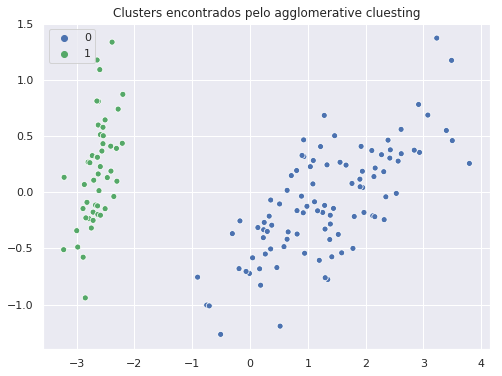

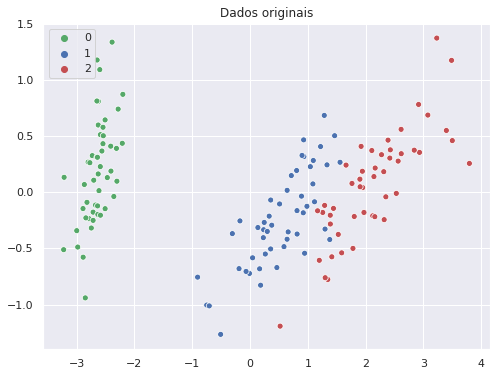

In [13]:
best_hc = AgglomerativeClustering(n_clusters=best["K"], affinity='euclidean', 
                                     linkage=best["Método"]).fit(X)

projected_x = PCA(n_components=best["K"]).fit_transform(X)

plt.figure(figsize=SIZE)
sns.scatterplot(projected_x[:, 0], projected_x[:, 1], hue=best_hc.labels_,
               palette=["b", "g"])
plt.title("Clusters encontrados pelo agglomerative cluesting")
plt.show()

plt.figure(figsize=SIZE)
sns.scatterplot(projected_x[:, 0], projected_x[:, 1], hue=y.astype(str),
               legend="full", palette=["g", "b", "r"])
plt.title("Dados originais");

Conforme pode ser observado no gráfico do Silhoutte score me função de K, todos os métodos apresentaram uma queda significativa conforme aumentamos o K;

Em geral o método Ward se mostrou o melhor para K entre 2 en 10 - acima disso o método average se mostrou mais competitivo;

O método complete apresentou o melhor resultado apenas 2 vezes das 18 análises feitas, se mostrando bem pouco competitivo quando comparado aos outros dois.

O melhor resultado obtido foi para K=2 para o método ward - com base nisso, projetamos os dados considerando apenas os 2 componentes principais e visualizamos o clustering feito pelo método.

Quando observamos a projeção com PCA dos dados, percebemos que o método com K=2 conseguiu separar complementante os dados entre 2 das 3 classes - isto é, 1 cluster determina unicamente a classe A, enquanto que o outro determina tanto a B como a C, o que nos fornece o valor alto de 0.68 para o silhoutte score.



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Q5

**Compare os métodos de clustering para os dados da iris usando a medida normalize mutual information (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html).**

In [14]:
scores = pd.DataFrame(columns=["Mutual info score", "Model"])
models = [KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering]
model_names = ["Kmeans", "Spectral Clustering", "DBSCAN", "Agglomerative Clustering"]

repetitions = 100
for _ in range(repetitions):
    for model, model_name in zip(models, model_names):
        clf = model().fit(X)
        labels = clf.labels_
        score = silhouette_score(X, labels, metric='euclidean')
        scores.loc[len(scores)] = [score, model_name]

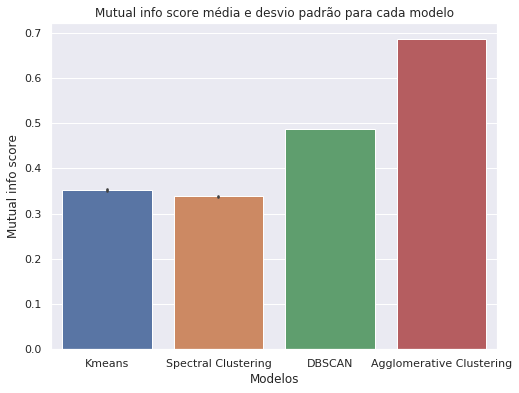

In [15]:
plt.figure(figsize=SIZE)
sns.barplot(data=scores, x="Model", y="Mutual info score")#, hue="Model")
plt.xlabel("Modelos")
plt.ylabel("Mutual info score")
plt.title("Mutual info score média e desvio padrão para cada modelo");

Analisamos cada um dos 4 algoritmos 100 vezes e tiramos as médias e desvio padrão de cada uma;

Conforme podemos ver pelo gráfico acima, considerando a medida Mutual Info Score, o  Kmeans e o Spectral Clustering obtiveram resultados muito próximos um ao outro, como um score de 0.35 e uym desvio padrão relativamente baixo;

Já o DBSCAN se mostrou significativamente mrlhor com um score de 0.5, enquanto que o Agglomerative Clustering disparadamente se mostrou o melhor dos 4, com um score próximo a 0.7.